# Import and load data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data = pd.read_csv("StudentsPerformance.csv")

# Data inspection 

In [2]:
print(data.head())
data.describe()

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [2]:
data.info()
data.columns = ['Gender','Race_eth','Parent_education','Lunch',
                'Test_prep','Math_score','Reading_score','Writing_score']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Plotting 

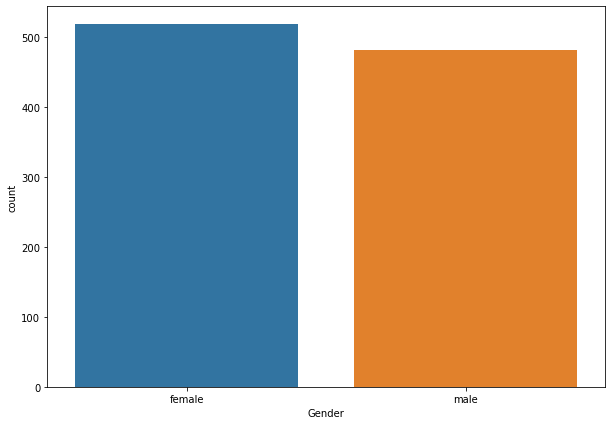

In [4]:
plt.figure(figsize=(10,7))
sns.countplot(data['Gender'])

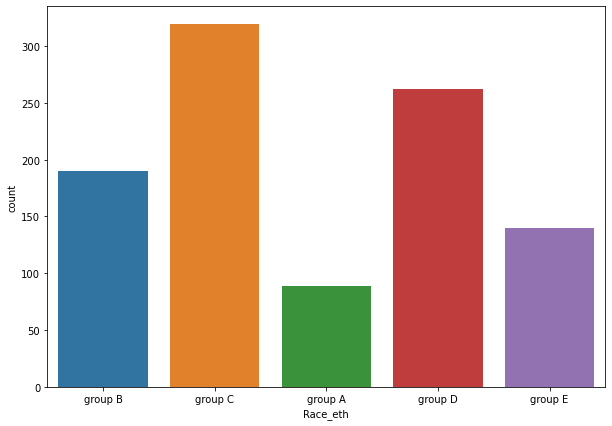

In [5]:
plt.figure(figsize=(10,7))
sns.countplot(data["Race_eth"])

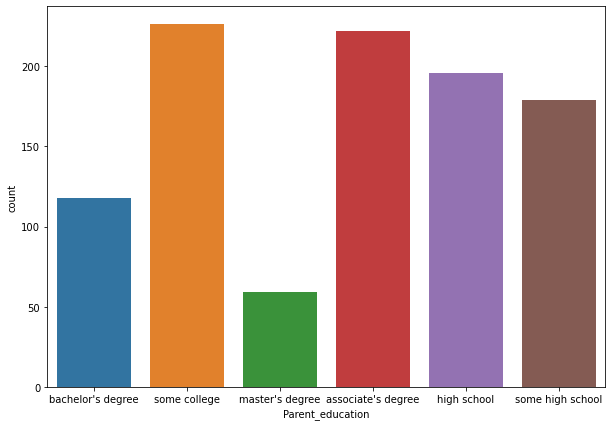

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(data["Parent_education"])

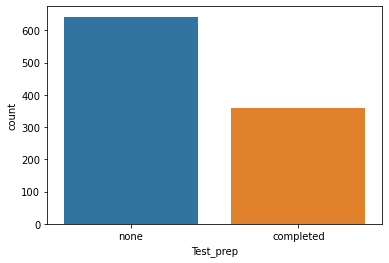

In [7]:
sns.countplot(data["Test_prep"])

<Figure size 720x504 with 0 Axes>

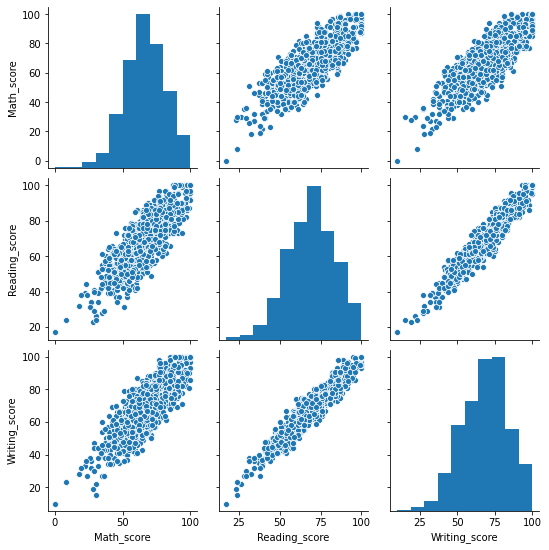

In [8]:
plt.figure(figsize=(10,7))
sns.pairplot(data)

# Modelling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = data.drop("Writing_score", axis = 1)
X = pd.get_dummies(X)
y = data["Writing_score"]

In [4]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3)

## linear regression

In [7]:
lm1 = LinearRegression()
lm1_fit = lm1.fit(x_train, y_train)
lm1_predict = lm1.predict(x_test)

rmse = mean_squared_error(y_test, lm1_predict)
print(rmse)

12.597618584542676


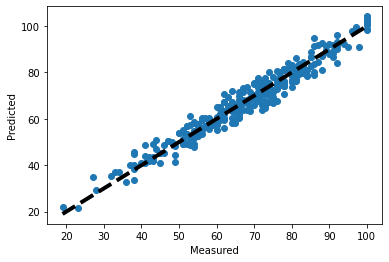

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_test, lm1_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## elastic net

In [9]:
enet = ElasticNet()
enet_fit = enet.fit(x_train, y_train)
enet_predict = enet.predict(x_test)

rmse1 = mean_squared_error(y_test, enet_predict)
print(rmse1)

19.217049757277437


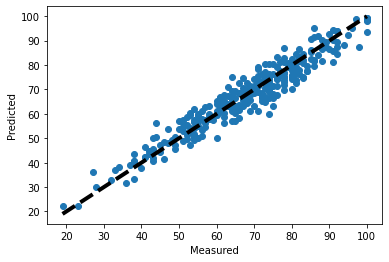

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_test, enet_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## random forest

In [11]:
rf = RandomForestRegressor()
rf_fit = rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

rmse2 = mean_squared_error(y_test, enet_predict)
print(rmse2)

19.217049757277437


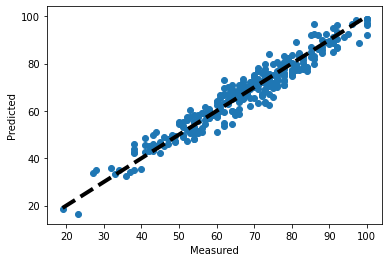

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, rf_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()